<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [37]:
# insert code here

# ライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [38]:
# insert code here

# データの読み込み
diabetes = load_diabetes()

In [39]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [40]:
# insert code here

#input
X = diabetes.data


#output
y = diabetes.target

In [94]:
X.shape

(442, 10)

In [95]:
y.shape

(442,)

### Split the data (training/test)

In [98]:
# insert code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create the model's architecture

In [99]:
# insert code here

# モデルの構築
model = Sequential()

In [100]:
# Add the first hidden layer
model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))

# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [101]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile the model

In [102]:
# insert code here

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

### Fit the training data

In [103]:
%%time
# insert code here

# トレーニングデータのフィッティング
fit = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=10,
         epochs = 100)

Epoch 1/100
31/31 [==============================] - 2s 15ms/step - loss: 29810.9746 - mse: 29810.9746 - val_loss: 27261.9688 - val_mse: 27261.9688
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 29757.6367 - mse: 29757.6367 - val_loss: 27200.1230 - val_mse: 27200.1250
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 29680.2207 - mse: 29680.2207 - val_loss: 27109.3125 - val_mse: 27109.3125
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 29567.3848 - mse: 29567.3848 - val_loss: 26984.0234 - val_mse: 26984.0234
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 29414.0332 - mse: 29414.0332 - val_loss: 26810.1758 - val_mse: 26810.1758
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 29204.8613 - mse: 29204.8613 - val_loss: 26584.8750 - val_mse: 26584.8750
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 28935.3730 - mse: 28935.3730 - val_loss: 262

31/31 [==============================] - 0s 6ms/step - loss: 3982.8989 - mse: 3982.8989 - val_loss: 3443.8179 - val_mse: 3443.8179
Epoch 58/100
31/31 [==============================] - 0s 5ms/step - loss: 3963.9309 - mse: 3963.9309 - val_loss: 3427.9656 - val_mse: 3427.9656
Epoch 59/100
31/31 [==============================] - 0s 6ms/step - loss: 3945.9451 - mse: 3945.9451 - val_loss: 3412.3740 - val_mse: 3412.3740
Epoch 60/100
31/31 [==============================] - 0s 6ms/step - loss: 3927.0400 - mse: 3927.0400 - val_loss: 3397.0374 - val_mse: 3397.0374
Epoch 61/100
31/31 [==============================] - 0s 7ms/step - loss: 3910.5217 - mse: 3910.5217 - val_loss: 3382.5498 - val_mse: 3382.5498
Epoch 62/100
31/31 [==============================] - 0s 10ms/step - loss: 3895.4700 - mse: 3895.4700 - val_loss: 3367.8411 - val_mse: 3367.8411
Epoch 63/100
31/31 [==============================] - 0s 5ms/step - loss: 3874.6780 - mse: 3874.6780 - val_loss: 3353.8044 - val_mse: 3353.8044
Epoc

### Create predictions

In [104]:
# insert code here

# 予測の作成
y_pred = model.predict(X_test)


5/5 [==============================] - 0s 2ms/step


In [105]:
y_pred

array([[163.48894 ],
       [163.70674 ],
       [155.56131 ],
       [268.47064 ],
       [147.2912  ],
       [124.960335],
       [224.25015 ],
       [198.09296 ],
       [109.94887 ],
       [132.271   ],
       [110.73349 ],
       [143.63252 ],
       [ 74.060036],
       [208.60123 ],
       [122.942116],
       [135.20709 ],
       [214.9721  ],
       [234.94934 ],
       [168.12785 ],
       [204.04718 ],
       [174.97426 ],
       [112.49818 ],
       [ 91.43705 ],
       [185.68335 ],
       [141.61102 ],
       [168.11806 ],
       [178.1157  ],
       [177.07965 ],
       [ 65.65998 ],
       [141.58992 ],
       [175.30325 ],
       [108.621414],
       [144.27225 ],
       [184.81023 ],
       [180.33795 ],
       [179.44019 ],
       [142.98317 ],
       [147.71474 ],
       [175.38939 ],
       [ 80.08128 ],
       [102.77466 ],
       [124.9679  ],
       [156.14825 ],
       [177.31816 ],
       [167.0722  ],
       [ 82.41146 ],
       [ 94.83758 ],
       [101.9

### Evaluate the model

In [106]:
# insert code here

# y_true を y_pred と同じ列数に調整
y_test_adjusted = np.repeat(y_test.reshape(-1, 1), y_pred.shape[1], axis=1)


# モデルの評価

mse = mean_squared_error(y_test_adjusted, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2976.0347991897306


### Visualisation of cost

In [107]:
type(fit.history)

dict

In [108]:
fit.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

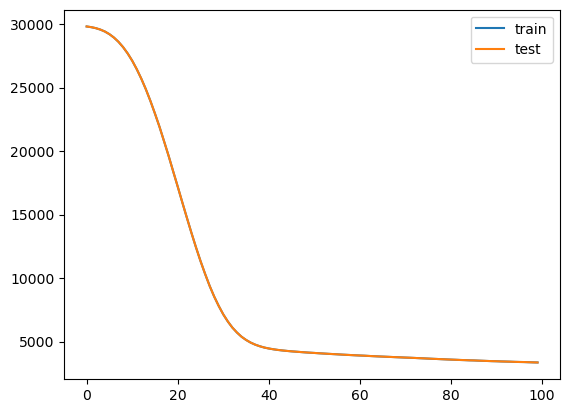

In [109]:
import matplotlib.pyplot as plt

# insert code here


plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['mse'], label='test')
plt.legend()

In [ ]:
## I don't know why train doesn't come out...

### Visualisation of residuals

In [17]:
# insert code here

#Sorry I don't completely understand.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



